# imp dep

In [151]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [152]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

In [153]:
models = {
        'Logistic Regression' : LogisticRegression(),
        'Decision Tree' :DecisionTreeClassifier(),
        'Random Forest' : RandomForestClassifier()
    
}

In [154]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [155]:
trained_models={}
for model_name, model in models.items():
    print(f"Cross Validate on {model_name}")

    cv_results = cross_validate(
        model,
        X_train,
        Y_train,
        cv=cv,
        scoring='f1',
        return_estimator=True,
        return_train_score=False,

    )
    test_scores = cv_results['score_time']
    best_index = np.argmax(test_score)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name]=estimator

Cross Validate on Logistic Regression
Cross Validate on Decision Tree
Cross Validate on Random Forest


In [156]:
trained_models

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier()}

In [157]:
Y_hat_tests = {}

for model_name,model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,)),
 'Decision Tree': array([0, 1, 0, ..., 0, 0, 1], shape=(1999,)),
 'Random Forest': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,))}

In [158]:
confusion_matrix_lr = confusion_matrix(Y_test,Y_hat_tests['Logistic Regression'])
confusion_matrix_dt1 = confusion_matrix(Y_test,Y_hat_tests['Decision Tree'])
confusion_matrix_rf = confusion_matrix(Y_test,Y_hat_tests['Random Forest'])

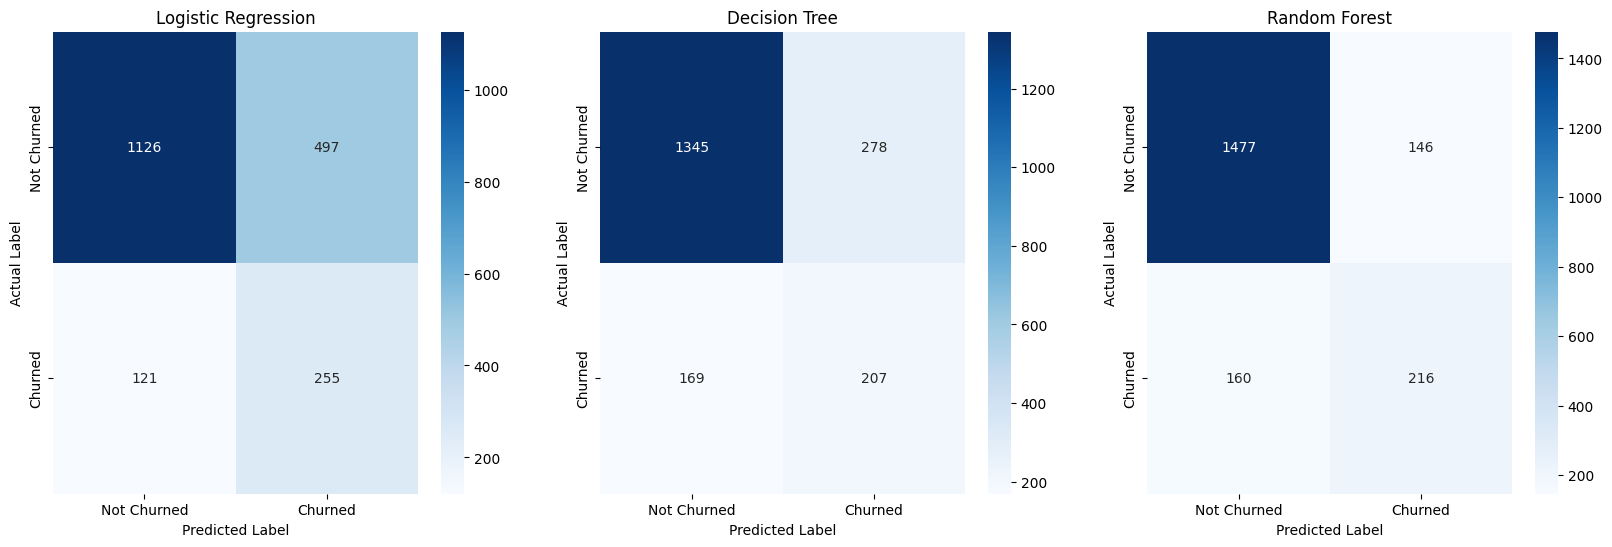

In [182]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'],ax=ax1)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('Actual Label')
ax1.set_title('Logistic Regression')

sns.heatmap(confusion_matrix_dt1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'],ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('Actual Label')
ax2.set_title('Decision Tree')

sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
ax3.set_xlabel('Predicted Label')
ax3.set_ylabel('Actual Label')
ax3.set_title('Random Forest')

plt.show()